In [ ]:
# Date: 08/06/2021.
# Title: Digit Recognizer.
# Author: Parmeshwar Prajapati.

### 1. Importing modules.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

### 2. Importing data.

In [2]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

print('Train shape:', raw_train.shape)
print('Test shape:', raw_test.shape)

Train shape: (42000, 785)
Test shape: (28000, 784)


In [50]:
# Splitting the features and target.

raw_train_ = raw_train.drop(columns = 'label')
raw_y_train = raw_train['label']

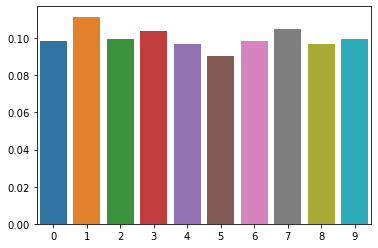

In [4]:
# Checking for unbalanced data.

counts = raw_y_train.value_counts()
sb.barplot(x = counts.index, y = counts.values/raw_y_train.shape[0])
plt.show()

### 3. Splitting the train data.

In [4]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(raw_train_, raw_y_train,
                                                  test_size = 0.1, 
                                                  stratify = raw_y_train,
                                                  random_state = 0)

X_train.reset_index(drop = True, inplace = True)
X_dev.reset_index(drop = True, inplace = True)

y_train.reset_index(drop = True, inplace = True)
y_dev.reset_index(drop = True, inplace = True)

print(X_train.shape)
print(y_train.shape)

print(X_dev.shape)
print(y_dev.shape)

(37800, 784)
(37800,)
(4200, 784)
(4200,)


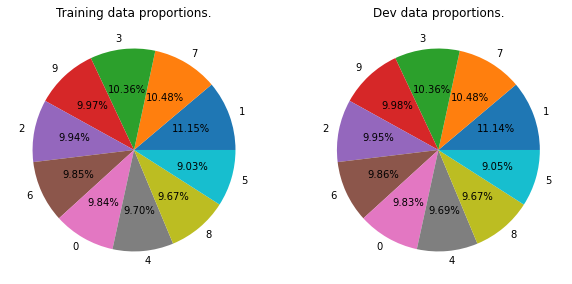

In [5]:
train_pie = y_train.value_counts()/y_train.shape[0]*100
dev_pie = y_dev.value_counts()/y_dev.shape[0]*100

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.title('Training data proportions.')
plt.pie(x = train_pie.values, labels = train_pie.index, autopct = '%.2f%%')

plt.subplot(122)
plt.title('Dev data proportions.')
plt.pie(x = dev_pie.values, labels = dev_pie.index, autopct = '%.2f%%')
plt.show()

In [5]:
# Normalizing data.

X_train = X_train/255
X_dev = X_dev/255
X_test = raw_test/255

X_train_nn = X_train.values.reshape((-1, 28, 28, 1))
X_dev_nn = X_dev.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))

print(X_train_nn.shape)
print(y_train.shape)
print(X_dev_nn.shape)
print(y_dev.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(37800,)
(4200, 28, 28, 1)
(4200,)
(28000, 28, 28, 1)


In [6]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization, Dropout 

In [7]:
input_shape = X_train_nn[0].shape
print(input_shape)

(28, 28, 1)


In [12]:
def prepare_model(input_shape):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(10, activation = 'softmax'))
    
    return model

In [8]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy

In [16]:
# Model1

model1 = prepare_model(input_shape)

model1.compile(loss = SparseCategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = [SparseCategoricalAccuracy()])

res1 = model1.fit(X_train_nn, y_train, epochs = 10, batch_size = 128,
                  validation_data = (X_dev_nn, y_dev), verbose = 2)

Epoch 1/10
296/296 - 4s - loss: 2.0323 - sparse_categorical_accuracy: 0.5017 - val_loss: 1.5273 - val_sparse_categorical_accuracy: 0.7676
Epoch 2/10
296/296 - 3s - loss: 1.0834 - sparse_categorical_accuracy: 0.8005 - val_loss: 0.7887 - val_sparse_categorical_accuracy: 0.8283
Epoch 3/10
296/296 - 3s - loss: 0.6505 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.5699 - val_sparse_categorical_accuracy: 0.8571
Epoch 4/10
296/296 - 3s - loss: 0.5037 - sparse_categorical_accuracy: 0.8687 - val_loss: 0.4818 - val_sparse_categorical_accuracy: 0.8717
Epoch 5/10
296/296 - 3s - loss: 0.4354 - sparse_categorical_accuracy: 0.8814 - val_loss: 0.4309 - val_sparse_categorical_accuracy: 0.8795
Epoch 6/10
296/296 - 3s - loss: 0.3953 - sparse_categorical_accuracy: 0.8894 - val_loss: 0.4054 - val_sparse_categorical_accuracy: 0.8850
Epoch 7/10
296/296 - 3s - loss: 0.3706 - sparse_categorical_accuracy: 0.8941 - val_loss: 0.3832 - val_sparse_categorical_accuracy: 0.8905
Epoch 8/10
296/296 - 3s - loss: 0.

In [9]:
def plots(result, plotting = True):
    
    if plotting == True:
        plt.figure(figsize = (8, 4))
        plt.subplot(121)
        plt.plot(result.history['sparse_categorical_accuracy'], 
                 label = 'sparse_categorical_accuracy')
        plt.plot(result.history['val_sparse_categorical_accuracy'],
                 label = 'val_sparse_categorical_accuracy')
        plt.legend()

        plt.subplot(122)
        plt.plot(result.history['loss'], label = 'loss')
        plt.plot(result.history['val_loss'], label = 'val_loss')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    print('Last value of SparseCategoricalAccuracy:',
          np.round(result.history['sparse_categorical_accuracy'][-1], 4))
    print('Last value of ValSparseCategoricalAccuracy:',
          np.round(result.history['val_sparse_categorical_accuracy'][-1], 4))

In [38]:
plots(res1, plotting = False)

Last value of SparseCategoricalAccuracy: 0.904
Last value of ValSparseCategoricalAccuracy: 0.8974


In [ ]:
# SparseCategoricalAccuracy: 0.904
# ValSparseCategoricalAccuracy: 0.8974

# Humans can identify numbers very easily. Accuracy should be around 99%.

# In the above model we need more information. So increasing the number of
# filters.

# Using 16 filters.
# -----------------
# Last value of SparseCategoricalAccuracy: 0.9015
# Last value of ValSparseCategoricalAccuracy: 0.8993

# Not much improvement.

# Using 32 filters.
# -----------------
# Last value of SparseCategoricalAccuracy: 0.9114
# Last value of ValSparseCategoricalAccuracy: 0.9079

# Using 64 filters.
# -----------------
# Last value of SparseCategoricalAccuracy: 0.9157
# Last value of ValSparseCategoricalAccuracy: 0.9112

# Using 128 filters.
# -----------------
# Time consuming.
# Last value of SparseCategoricalAccuracy: 0.9126
# Last value of ValSparseCategoricalAccuracy: 0.9098

#===================
# Using 64 filters.
#===================

In [ ]:
# Adding another 64 filters for more information.

# Took a lot of time. So, using MaxPooling filter 
# Last value of SparseCategoricalAccuracy: 0.9651
# Last value of ValSparseCategoricalAccuracy: 0.9538

# Improvement observed.
#======================================================

# Adding more Conv layer followed by MaxPooling.
# Last value of SparseCategoricalAccuracy: 0.9723
# Last value of ValSparseCategoricalAccuracy: 0.9669

# Improvement observed.
#======================================================

# Adding another conv and maxpooling layer.
# Last value of SparseCategoricalAccuracy: 0.9452
# Last value of ValSparseCategoricalAccuracy: 0.9369

# No improvement.
# Removing the above added layers.
#======================================================

# Using the previous conv and maxpooling layer and adding dense layers.
# Last value of SparseCategoricalAccuracy: 0.9756
# Last value of ValSparseCategoricalAccuracy: 0.9671

# Improvement observed.
#======================================================

# Adding more dense layers.
# Last value of SparseCategoricalAccuracy: 0.9957
# Last value of ValSparseCategoricalAccuracy: 0.9757

# Improvement observed.
#======================================================

# The training accuracy has reached human level accuracy. Now,
# we need to increase the validation accuracy.

# From the above values we can say that model is overfitting. 
# Using dropout rate to handle overfitting.
# Before this try adding few more layers as dropout may decrease training
# accuracy.

# Adding more dense layers.
# Last value of SparseCategoricalAccuracy: 0.9945
# Last value of ValSparseCategoricalAccuracy: 0.9717

# Training accuracy decreased along with validation accuracy.

# No imporovement.
#======================================================

# Adding layer of different size. less than 512.
# Using 256 (obesrvation: using smaller units increases val_accuracy)
# Last value of SparseCategoricalAccuracy: 0.9947
# Last value of ValSparseCategoricalAccuracy: 0.981

# Imporovement.
#======================================================

# Applying dropout layers.
# Using droprate = 0.2
# Last value of SparseCategoricalAccuracy: 0.9922
# Last value of ValSparseCategoricalAccuracy: 0.9898

# Imporovement.
#======================================================

# Using droprate = 0.3
# Last value of SparseCategoricalAccuracy: 0.9908
# Last value of ValSparseCategoricalAccuracy: 0.989

# Decreased value.
#======================================================

# Using droprate = 0.2 and adding a layer to account for 
# loss in training acccuracy.
# Last value of SparseCategoricalAccuracy: 0.9917
# Last value of ValSparseCategoricalAccuracy: 0.9874

# Decreased value.
#======================================================

# Removing the above added layer and using ReduceLRonplateau

#=============================================================================
# Don't use BatchNormalization before output layer.
#=============================================================================

In [10]:
from keras.callbacks import ReduceLROnPlateau

In [11]:
redLR = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', 
                          factor = 0.1, patience = 5)

In [15]:
def prepare_model(input_shape, drop_rate = 0.2):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = 'relu')) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    return model

model2 = prepare_model(input_shape)

model2.compile(loss = SparseCategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = [SparseCategoricalAccuracy()])

res2 = model2.fit(X_train_nn, y_train, epochs = 15, batch_size = 128,
                  validation_data = (X_dev_nn, y_dev), callbacks = [redLR],
                  verbose = 0)

In [16]:
plots(res2, plotting = False)

Last value of SparseCategoricalAccuracy: 0.9983
Last value of ValSparseCategoricalAccuracy: 0.9905


In [18]:
model2.save('model9905.h5')

In [19]:
# Predictions.

y_test_pred = model2.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)

In [20]:
pred_data = pd.DataFrame({'ImageId': list(range(1, len(y_test_pred) + 1)),
                          'Label': y_test_pred})

pred_data.to_csv('2ndsubmission.csv', index = False)

In [24]:
pd.DataFrame({'Submission': [1, 2],
              'Score': [0.98657, 0.99300],
              'Rank': [2581, 1078]}).set_index('Submission')

,Score,Rank
Submission,,
1,0.98657,2581
2,0.99300,1078


In [ ]:
#================================================
# Note always use ReduceLROnPlateau from begining.
#================================================

# For increasing the val score.
# Increasing units from 256 to 512.
# Last value of SparseCategoricalAccuracy: 0.9963
# Last value of ValSparseCategoricalAccuracy: 0.9914

# Improvement.
#================================================

# Increasing the units decreased the train acc and increased val acc.

In [32]:
redLR = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', 
                          factor = 0.1, patience = 5)

def prepare_model(input_shape, drop_rate = 0.2):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = 1, 
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = 'relu')) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    return model

model3 = prepare_model(input_shape)

model3.compile(loss = SparseCategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = [SparseCategoricalAccuracy()])

res3 = model3.fit(X_train_nn, y_train, epochs = 15, batch_size = 128,
                  validation_data = (X_dev_nn, y_dev), callbacks = [redLR],
                  verbose = 0)

In [33]:
plots(res3, plotting = False)

Last value of SparseCategoricalAccuracy: 0.9963
Last value of ValSparseCategoricalAccuracy: 0.9914


In [35]:
model3.save('model9914.h5')

In [36]:
# Predictions.

y_test_pred = model3.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)

pred_data = pd.DataFrame({'ImageId': list(range(1, len(y_test_pred) + 1)),
                          'Label': y_test_pred})

pred_data.to_csv('3rdsubmission.csv', index = False)

In [37]:
pd.DataFrame({'Submission': [1, 2, 3],
              'Score': [0.98657, 0.99300, 0.99346],
              'Rank': [2581, 1078, 960]}).set_index('Submission')

,Score,Rank
Submission,,
1,0.98657,2581
2,0.99300,1078
3,0.99346,960


In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
def error_analysis(conf_matrix):
    conf_matrix_error_analysis = conf_matrix
    np.fill_diagonal(conf_matrix_error_analysis, 0)

    plt.title('Recall')
    plt.imshow(conf_matrix_error_analysis/np.sum(conf_matrix_error_analysis, 
                                                 axis = 1),
               cmap = plt.cm.gray)
    plt.show()

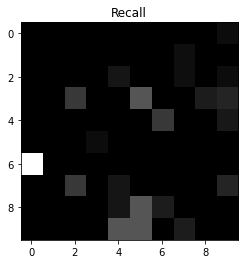

In [48]:
y_dev_nn_pred = model3.predict(X_dev_nn)
y_dev_nn_pred = np.argmax(y_dev_nn_pred, axis = 1)

conf_matrix = confusion_matrix(y_dev, y_dev_nn_pred)
error_analysis(conf_matrix)

In [ ]:
# Can't distinguish between 6 and 0.

In [ ]:
# Can use Data Augmentation for increasing the accuracy further.